In [1]:
import numpy as np
import pandas as pd

In [2]:
metropolitan_dataset = pd.read_csv('Standard Metropolitan Areas Data - train_data - data.csv')
metropolitan_dataset.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


<AxesSubplot:>

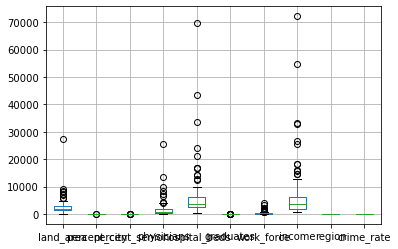

In [3]:
metropolitan_dataset.boxplot()

In [4]:
def replace(data):
    for x in data:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        data.loc[data[x] < min,x] = np.nan
        data.loc[data[x] > max,x] = np.nan

In [5]:
replace(metropolitan_dataset)
metropolitan_dataset.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,91.000000,97.000000,95.000000,91.000000,87.000000,93.000000,85.000000,87.000000,99.000000,99.000000
mean,1979.813187,41.428866,9.545263,1114.593407,3813.655172,54.193548,256.360000,3757.609195,2.494949,55.643030
std,1033.125311,15.730014,1.735105,959.865037,2219.560059,6.477802,151.221319,2552.468310,1.013921,13.470943
min,47.000000,13.400000,6.000000,140.000000,481.000000,38.800000,66.900000,769.000000,1.000000,23.320000
25%,1388.000000,29.900000,8.350000,441.000000,2120.000000,50.400000,138.600000,1959.500000,2.000000,46.115000
50%,1750.000000,39.200000,9.700000,751.000000,3215.000000,54.000000,212.600000,2962.000000,3.000000,56.060000
75%,2621.000000,51.100000,10.650000,1514.000000,5276.000000,57.800000,318.500000,4476.000000,3.000000,63.860000
max,4647.000000,80.600000,13.400000,4047.000000,9976.000000,68.300000,710.400000,12591.000000,4.000000,85.620000


<AxesSubplot:>

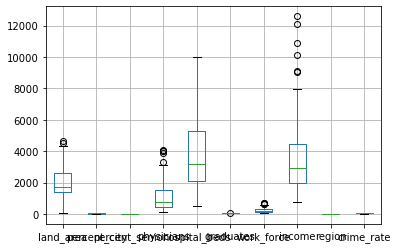

In [6]:
metropolitan_dataset.boxplot()

In [7]:
metropolitan_dataset.isnull().sum()

land_area          8
percent_city       2
percent_senior     4
physicians         8
hospital_beds     12
graduates          6
work_force        14
income            12
region             0
crime_rate         0
dtype: int64

In [8]:
metropolitan_numeric = metropolitan_dataset.select_dtypes(include=[np.number])
numeric_cols = metropolitan_numeric.columns.values

for col in numeric_cols:
    missing =metropolitan_dataset[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        med = metropolitan_dataset[col].median()
        metropolitan_dataset[col] = metropolitan_dataset[col].fillna(med)

imputing missing values for: land_area
imputing missing values for: percent_city
imputing missing values for: percent_senior
imputing missing values for: physicians
imputing missing values for: hospital_beds
imputing missing values for: graduates
imputing missing values for: work_force
imputing missing values for: income


In [9]:
metropolitan_dataset.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn import preprocessing, utils

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
lab = preprocessing.LabelEncoder()
y_data = metropolitan_dataset.crime_rate
y = lab.fit_transform(y_data)
X = metropolitan_dataset.drop('crime_rate', axis=1)
y

array([89, 48, 14, 81, 94, 57, 87, 76,  4, 46, 44, 37, 55, 70, 74, 20, 75,
       31, 90, 68, 97, 39, 63, 53, 50, 92, 33, 38, 10, 60, 22, 54, 17, 78,
       65, 35, 26, 45,  1,  5, 36, 66, 88, 28, 47, 25, 34, 56, 82, 62, 32,
       91, 71, 95, 41, 58, 19, 59, 11, 52, 12, 73, 79, 86, 29, 21, 85, 93,
       16, 42,  0, 64,  3, 49, 96,  8,  2, 80, 15, 27, 43, 69, 18, 13, 72,
       84,  9, 24, 30, 23, 51, 77, 40, 67, 86,  7, 61,  6, 83])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
clf_1 = RandomForestClassifier(min_samples_leaf=2, random_state=9)
clf_1.fit(X_train,y_train)

#model for tuning the max depth
clf_2 = RandomForestClassifier(max_depth = 5, random_state=9)
clf_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=9)

In [23]:
# predicting for min_samples 0f leaf as 2.
y_clf_1 = clf_1.predict(X_test)

# predicting for max depth 5.
y_clf_2 = clf_2.predict(X_test)

In [25]:
#calculate accuracy and roc auc score for min leaf samples

accuracy_clf_1 = accuracy_score(y_test, y_clf_1)
#auc_roc1 = roc_auc_score(y_test, y_clf_1)
print("Accuracy score of the model with min sample leaf 2 is: {}".format(accuracy_clf_1))
#print("roc_auc_score of the model1 is: {}".format(auc_roc1))

print("\n")

#calculate accuracy and roc auc score for max depth 5

accuracy_clf_2 = accuracy_score(y_test,y_clf_2)
#auc_roc2 = roc_auc_score(y_test, y_clf_2)
print("Accuracy score of the model with max depth 5 is: {}".format(accuracy_clf_2))
#print("roc_auc_score of the model2 is: {}".format(auc_roc2))

Accuracy score of the model with min sample leaf 2 is: 0.0


Accuracy score of the model with max depth 5 is: 0.0
